In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Load data

In [2]:
coffee_data = pd.read_csv('/content/index.csv')

EDA

In [4]:
coffee_data.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [5]:
coffee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [6]:
coffee_data.isnull().sum()

,0
date,0
datetime,0
cash_type,0
card,89
money,0
coffee_name,0


In [7]:
coffee_data.duplicated().sum()

0

In [8]:
coffee_data.describe().T

,count,mean,std,min,25%,50%,75%,max
money,1133.0,33.105808,5.035366,18.12,28.9,32.82,37.72,40.0


In [9]:
coffee_data.loc[:,['cash_type','card','coffee_name']].describe().T

,count,unique,top,freq
cash_type,1133,2,card,1044
card,1044,446,ANON-0000-0000-0012,88
coffee_name,1133,8,Americano with Milk,268


In [7]:
# Convert Date to datetime type
coffee_data["date"] = pd.to_datetime(coffee_data["date"])

In [8]:
 # Check the data types
 print(coffee_data.dtypes)

date           datetime64[ns]
datetime               object
cash_type              object
card                   object
money                 float64
coffee_name            object
dtype: object


In [17]:
# Extract month and year from the Date
coffee_data['Month'] = coffee_data['date'].dt.month
coffee_data['Year'] = coffee_data['date'].dt.year

In [19]:
# Drop the original Date column
coffee_data.drop(columns=['date'], inplace=True)

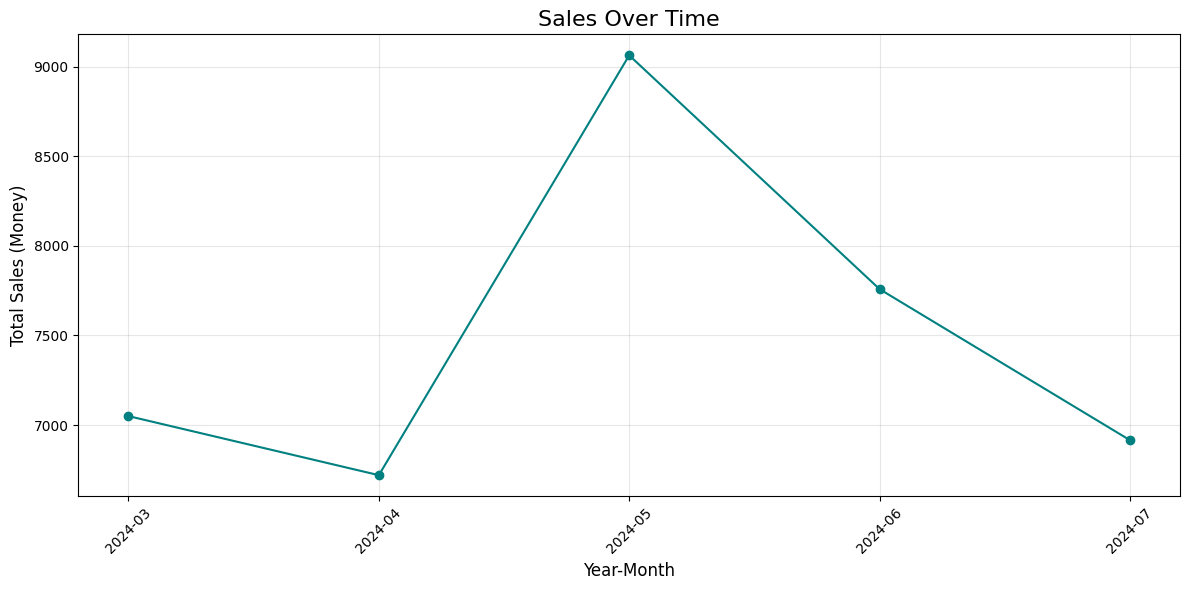

In [28]:
# Sales over time
# Aggregate sales ('money') by Month and Year instead of date
sales_over_time = coffee_data.groupby(['Year', 'Month'])['money'].sum()

# Plot sales over time using Month and Year
plt.figure(figsize=(12, 6))
plt.plot(sales_over_time.index.map(lambda x: f"{x[0]}-{x[1]:02}"), sales_over_time.values, marker='o', linestyle='-', color='teal')  # Format index for x-axis
plt.title("Sales Over Time", fontsize=16)
plt.xlabel("Year-Month", fontsize=12)  # Update x-axis label
plt.ylabel("Total Sales (Money)", fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

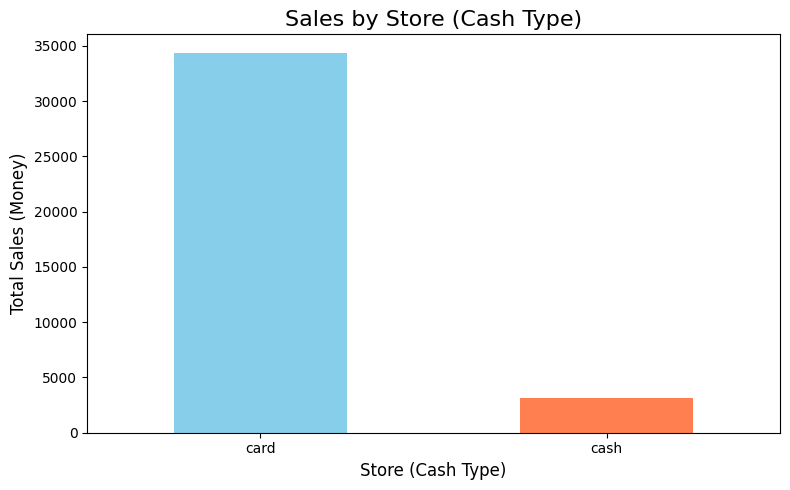

In [32]:
# Aggregate sales ('money') by 'cash_type' (representing stores or categories)
sales_by_store = coffee_data.groupby('cash_type')['money'].sum() # Changed 'data' to 'coffee_data'

# Sales by store
plt.figure(figsize=(8, 5))
sales_by_store.plot(kind='bar', color=['skyblue', 'coral'])
plt.title("Sales by Store (Cash Type)", fontsize=16)
plt.xlabel("Store (Cash Type)", fontsize=12)
plt.ylabel("Total Sales (Money)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

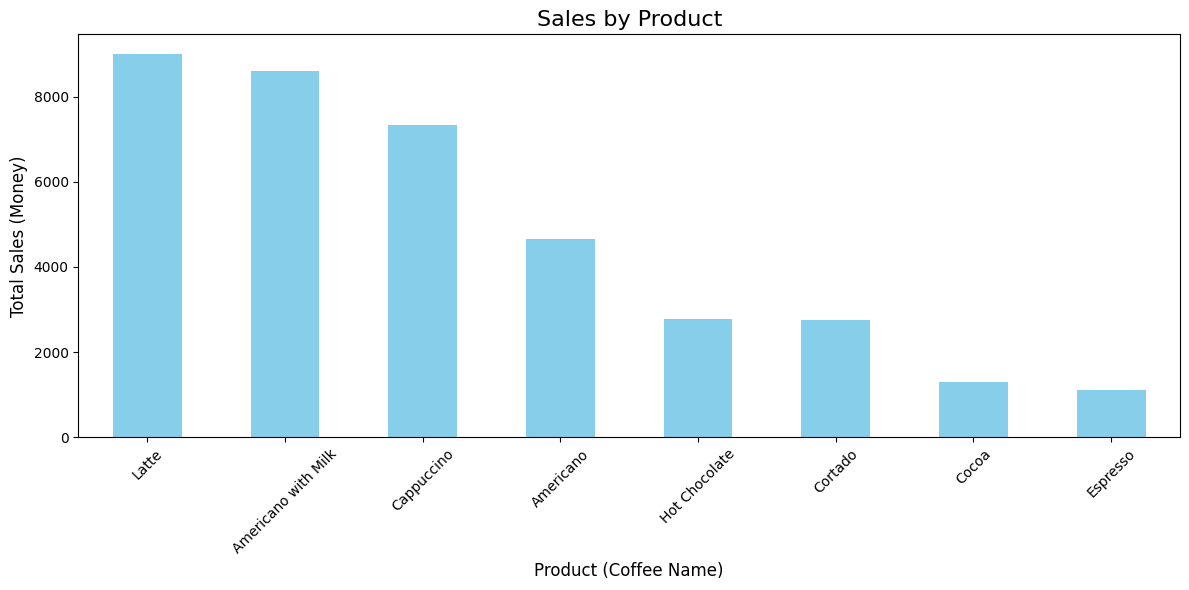

In [34]:
# Sales by product
# Aggregate sales ('money') by product ('coffee_name')
sales_by_product = coffee_data.groupby('coffee_name')['money'].sum() # Changed 'data' to 'coffee_data'

# Plot sales by product
plt.figure(figsize=(12, 6))
sales_by_product.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Sales by Product", fontsize=16)
plt.xlabel("Product (Coffee Name)", fontsize=12)
plt.ylabel("Total Sales (Money)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
#Splitting the Data
from sklearn.model_selection import train_test_split

# Assuming 'money' is the target variable and the rest are features
# Drop unnecessary columns and handle NaN if required
X = coffee_data.drop(['money', 'datetime'], axis=1)  # Features
y = coffee_data['money']  # Target variable (sales amount)

# Convert categorical variables to dummy/one-hot encoding if necessary
X = pd.get_dummies(X, drop_first=True)

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)

Training data shape (X_train): (906, 455)
Testing data shape (X_test): (227, 455)


In [41]:
#Training a Simple Model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error


# Preprocess the data
# Encode categorical columns (e.g., 'coffee_name', 'cash_type')
encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'
encoded_features = encoder.fit_transform(coffee_data[['coffee_name', 'cash_type']]) # Changed 'data' to 'coffee_data'

# Combine encoded features with numerical columns (if any)
X = pd.concat([
    pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(['coffee_name', 'cash_type'])),
], axis=1)

# Target variable
y = coffee_data['money'] # Changed 'data' to 'coffee_data'

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Show model coefficients (optional)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 3.3418022128658236
                           Feature  Coefficient
0            coffee_name_Americano    -4.982836
1  coffee_name_Americano with Milk    -0.273583
2           coffee_name_Cappuccino     5.158454
3                coffee_name_Cocoa     4.750763
4              coffee_name_Cortado    -4.660935
5             coffee_name_Espresso   -10.057811
6        coffee_name_Hot Chocolate     5.297859
7                coffee_name_Latte     4.768089
8                   cash_type_card    -1.312929
9                   cash_type_cash     1.312929


In [42]:
#Model Interpretation and Conclusion
# Extract feature names and coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display sorted coefficients
print("Model Coefficients:")
print(coefficients)

# Interpretation
print("\nConclusion:")
print("- Positive coefficients indicate features that are positively correlated with the target (money).")
print("- Negative coefficients indicate features that are negatively correlated with the target.")
print("- Larger absolute values indicate stronger relationships.")

Model Coefficients:
                           Feature  Coefficient
6        coffee_name_Hot Chocolate     5.297859
2           coffee_name_Cappuccino     5.158454
7                coffee_name_Latte     4.768089
3                coffee_name_Cocoa     4.750763
9                   cash_type_cash     1.312929
1  coffee_name_Americano with Milk    -0.273583
8                   cash_type_card    -1.312929
4              coffee_name_Cortado    -4.660935
0            coffee_name_Americano    -4.982836
5             coffee_name_Espresso   -10.057811

Conclusion:
- Positive coefficients indicate features that are positively correlated with the target (money).
- Negative coefficients indicate features that are negatively correlated with the target.
- Larger absolute values indicate stronger relationships.
